In [ ]:
!pip install albumentations==1.4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QU53mBRI8tBQcNuJX6VK")
project = rf.workspace("dental-2cwjj").project("dental-oa69c")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dental-1 in yolov8:: 100%|██████████| 1189/1189 [00:00<00:00, 2061.12it/s]


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data='/content/Dental-1/data.yaml' epochs=250 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 67.7MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Customize validation settings
validation_results = model.val(data="/content/Dental-1/data.yaml", imgsz=640, batch=16, conf=0.25, iou=0.6, device="0")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11131776 parameters, 

In [ ]:
!yolo predict model= '/content/runs/detect/train/weights/best.pt' source='/content/Dental-2/test/images/165_jpg.rf.c4df57d7c227f1cc092bd6b8af0f476f.jpg'

Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,131,776 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/Dental-2/test/images/165_jpg.rf.c4df57d7c227f1cc092bd6b8af0f476f.jpg: 640x640 1 LCD, 1 LID, 2 LIUs, 3 LMDs, 2 LMUs, 3 LPMDs, 4 LPMUs, 3 RCDs, 2 RIDs, 2 RIUs, 3 RMDs, 2 RMUs, 2 RPMDs, 3 RPMUs, 16.3ms
Speed: 3.1ms preprocess, 16.3ms inference, 537.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:

# Load a pretrained YOLO11n model
model = YOLO("/content/best (1).pt")

# Define path to the image file
source = "/content/Dental-1/test/images/135_jpg.rf.f7331490d6b6f5f52904889bd0de6164.jpg"

# Run inference on the source
results = model(source)  # list of Results objects

# Show the results
print(results[0])


image 1/1 /content/Dental-1/test/images/135_jpg.rf.f7331490d6b6f5f52904889bd0de6164.jpg: 640x640 1 LCD, 1 LCU, 2 LIDs, 3 LIUs, 3 LMDs, 2 LMUs, 2 LPMDs, 1 RCD, 1 RCU, 2 RIDs, 2 RIUs, 2 RMDs, 4 RMUs, 1 RPMD, 2 RPMUs, 19.4ms
Speed: 3.2ms preprocess, 19.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'LCD', 1: 'LCU', 2: 'LID', 3: 'LIU', 4: 'LMD', 5: 'LMU', 6: 'LPMD', 7: 'LPMU', 8: 'RCD', 9: 'RCU', 10: 'RID', 11: 'RIU', 12: 'RMD', 13: 'RMU', 14: 'RPMD', 15: 'RPMU'}
orig_img: array([[[ 83,  83,  83],
        [ 89,  89,  89],
        [ 92,  92,  92],
        ...,
        [ 93,  93,  93],
        [ 91,  91,  91],
        [ 89,  89,  89]],

       [[237, 237, 237],
        [250, 250, 250],
        [255, 255, 255],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [244, 244, 244]],

       [[251, 251, 251],
        [250, 250, 250],
        [249, 249, 249],
        ...,
        [249, 249, 249],
        [251, 251, 251],
        [253, 253, 253]],

       ...,

       [[165, 165, 165],
        [ 49,  49,  49],
        [ 25,  25,  25],
        ...,
        [ 47,  47,  47],
        [ 73,  73,  73],
        [109, 109, 109]],

    

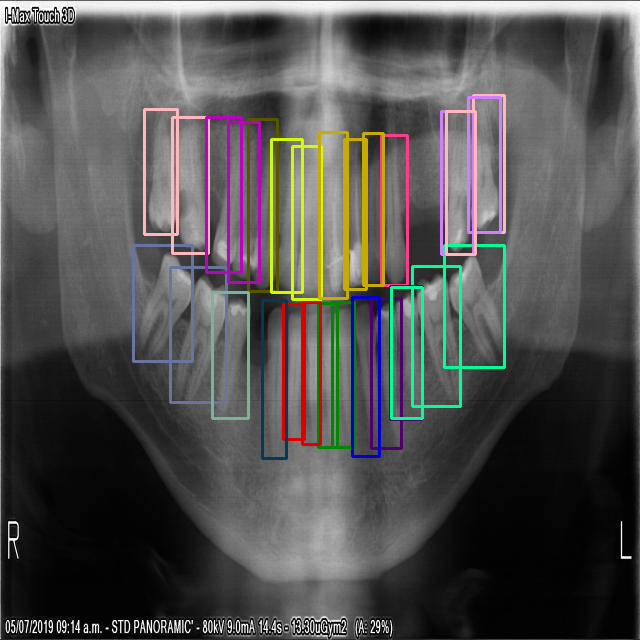

NameError: name 'destination' is not defined

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import colorcet as cc
import seaborn as sns

# creating color palette
palette = sns.color_palette(cc.glasbey, n_colors=16)    # n_colors = num of classes
palette = [tuple([255*x for x in color]) for color in palette]  # scale to 255

output_img = cv2.imread(source)
for result in results:
    for i, xyxy in enumerate(result.boxes.xyxy):    # for all bboxes
        x1, y1, x2, y2 = xyxy
        class_id = int(result.boxes.cls[i])
        class_name = result.names[class_id]
        class_conf = float(result.boxes.conf[i])
        # print(f"Class ID: {class_id:2}\tClass Name: {class_name:4}\tConf: {class_conf:.2%}")
        cv2.rectangle(output_img, (int(x1), int(y1)), (int(x2), int(y2)), color=palette[class_id], thickness=2)

cv2_imshow(output_img)
cv2.imwrite(destination, output_img)

In [ ]:
for result in results:
   x1, y1, x2, y2= result[:4]
   print(x1)

ValueError: too many values to unpack (expected 4)

In [ ]:
import cv2

# Example prediction outputs
# Assuming preds contains a list of [x1, y1, x2, y2, class_id, confidence]


# Loop over the predictions
for result in results:
   x1, y1, x2, y2= result[:4]  # Get bounding box coordinates
    # Draw the bounding box on the image
   cv2.rectangle(source, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)

# Display or save the modified image
cv2.imshow('Predictions', source)

ValueError: not enough values to unpack (expected 6, got 4)

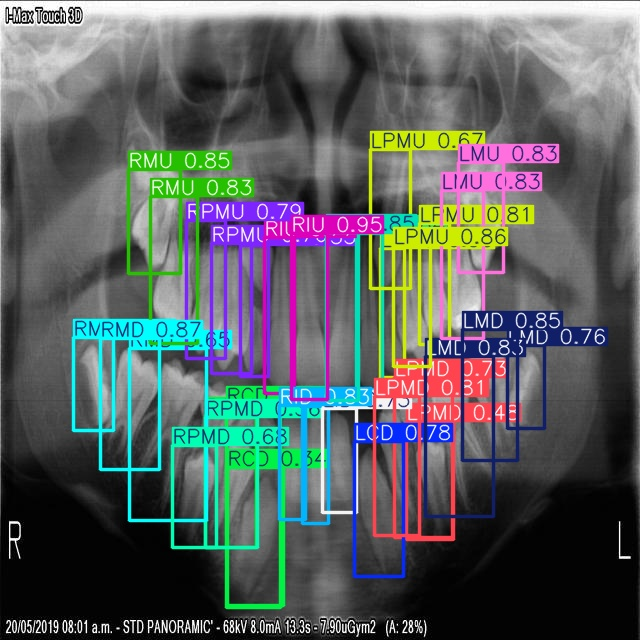

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/detect/predict/165_jpg.rf.c4df57d7c227f1cc092bd6b8af0f476f.jpg')

In [ ]:
!git clone https://github.com/ultralytics/yolov8s

Cloning into 'yolov8s'...
fatal: could not read Username for 'https://github.com': No such device or address
